# Task2

## 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 데이터 불러오기

In [2]:
df = pd.read_csv('hw2_train.csv')
x1 = df['x1']
x2 = df['x2']
y = df['y']

print(df)

            x1        x2  y
0     2.948287 -0.021679  0
1    -0.535186  0.004075  1
2    -1.773161  1.033747  1
3     0.170943 -1.337417  1
4    -1.376378  0.364972  1
...        ...       ... ..
1495 -3.194169 -0.197228  1
1496  2.553774 -0.148602  0
1497 -0.794583  0.392619  1
1498 -0.485204  0.416609  1
1499  2.306127  1.257547  0

[1500 rows x 3 columns]


## 함수

* 'Hw1_predic' 함수 = 'Hw2_predic' 함수
* 색의 진함의 차이

/var/folders/ss/nht4j77n2w126s17mwpbcpxm0000gn/T/ipykernel_24477/3929027623.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x1[i], x2[i], 'ko', color='y')


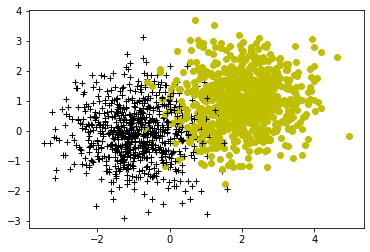

In [3]:
def Draw(): 
  for i in range(1500):
    if (y[i] == 1):
      plt.plot(x1[i], x2[i], 'k+')
    elif (y[i] == 0):
      plt.plot(x1[i], x2[i], 'ko', color='y')
  plt.show()

def Draw2():
  for i in range(1500):
    if (y[i] == 1):
      plt.plot(x1[i], x2[i], 'k+')
    elif (y[i] == 0):
      plt.plot(x1[i], x2[i], 'ko', color='y')

Draw()

def Hw2_Predic(x2_pred, y):
  Draw2()
  plt.plot(x1, x2_pred, 'ko', alpha=0.1, color='blue')
  plt.show()

def Hw1_Predic(x2_pred, y):
  Draw2()
  plt.plot(x1, x2_pred, 'ko', alpha=0.7, color='blue')
  plt.show()

# 시그모이드 함수
def Sigmoid(z):
    return 1/(1+np.e**(-z))

# Task1

## theta 구하기

[[ 0.65052637]
 [-0.22813649]
 [-0.07331323]]
0 =  [-0.07331323] * x2 + [-0.22813649]  * x1 + [0.65052637]


/var/folders/ss/nht4j77n2w126s17mwpbcpxm0000gn/T/ipykernel_24477/3929027623.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x1[i], x2[i], 'ko', color='y')
/var/folders/ss/nht4j77n2w126s17mwpbcpxm0000gn/T/ipykernel_24477/3929027623.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x1, x2_pred, 'ko', alpha=0.1, color='blue')


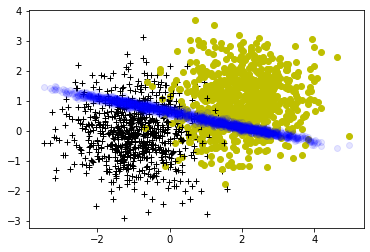

In [4]:
# e의 지수 승 : z 구하기
A = pd.DataFrame({'1': 1, '2': df['x1'], '3': (df['x2'])}) 

b = pd.DataFrame({'1': df['y']})

pre_theta1 = (A.T).dot(A)                           # 괄호 안 계산

pre_theta1_reverse = np.linalg.inv(pre_theta1)      # 역행렬

pre_theta2 = A.T                                    # A의 전치행렬

pre_theta3 = b                                      # b

temp_theta = (pre_theta1_reverse).dot(pre_theta2)   # 역행렬한 것과 A의 전치행렬 곱셈

theta = temp_theta.dot(b)                           # 위의 결과와 행렬 b 곱셈

print(theta) 

a = theta[2]
b = theta[1]
c = theta[0]

print('0 = ',a,'* x2 +',b,' * x1 +',c)

z = a*x2+b*x1+c  
                     
Hw2_Predic(z, x2)

## 최적의 a, b, c 값 구하기

In [28]:
learning_rate = 0.01      

for epoch in range(100000):
  z = a*x2+b*x1+c

  a_grad = sum(x2*((Sigmoid(z))-y))/1500
  b_grad = sum(x1*((Sigmoid(z))-y))/1500
  c_grad = sum((Sigmoid(z))-y)/1500

  a = a - learning_rate*a_grad
  b = b - learning_rate*b_grad
  c = c - learning_rate*c_grad

  if epoch%10000 == 0:
    z = a*x2+b*x1+c
    
    x2_pred = x1*(-(b/a))-(c/a)      
    Hw1_Predic(x2_pred,x2)                  # train data + linear decision boundary 시각화
    print('\n a: ',a, 'b :', b, 'c: ',c)    # 주기를 1000으로하여 최적의 a, b, c값 출력
    print('------------------------------------------------------')

KeyboardInterrupt: 

In [29]:
a = -1.15073793
b = -3.77371361
c = 2.28758314

# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

## 크로스 엔트로피 구하기

/var/folders/ss/nht4j77n2w126s17mwpbcpxm0000gn/T/ipykernel_24477/2711213608.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(z, Sigmoid(z), 'ko', color='r')


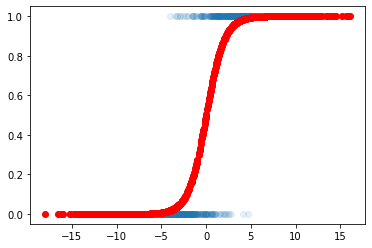


 task1's total cost:  0.10636790396670684


In [31]:
z = a*x2 + b*x1 + c
plt.plot(z, Sigmoid(z), 'ko', color='r')
plt.scatter(z, y, alpha=0.1)                 
plt.show()


# task1의 total cost
task1_total_cost = sum(y*np.log(Sigmoid(z))+(1-y)*np.log(1-Sigmoid(z)))/(-1500)
print("\n task1's total cost: ",task1_total_cost)

## Result

In [32]:
print("\n task1's a :", a)
print("\n task1's b :", b)
print("\n task1's c :", c)
print("\n task1's total cost :",task1_total_cost)


 task1's a : -1.15073793

 task1's b : -3.77371361

 task1's c : 2.28758314

 task1's total cost : 0.10636790396670684


# Task2

## test 데이터로 test하기

In [33]:
df2 = pd.read_csv('hw2_test.csv')

In [34]:
df2_y = df2['y']

z2 = a*df2['x2']+b*df2['x1']+c

## test : 시그모이드 함수 출력

/var/folders/ss/nht4j77n2w126s17mwpbcpxm0000gn/T/ipykernel_24477/3134682743.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(z2, Sigmoid(z2), 'ko', color='r')


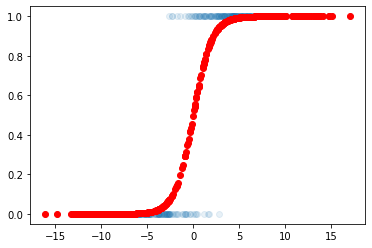

In [35]:
plt.plot(z2, Sigmoid(z2), 'ko', color='r')
plt.scatter(z2, df2_y, alpha=0.1)
plt.show()

## task2의 total cost를 구하기

In [36]:
task2_total_cost = sum(df2_y*np.log(Sigmoid(z2))+(1-df2_y)*np.log(1-Sigmoid(z2)))/(-500)
print("\n task2's total cost: ",task2_total_cost)


 task2's total cost:  0.08808280778078409


## 최적 값 a, b, c를 test data에 적용

In [37]:
test = Sigmoid(z2)

# 시그모이드 함수 결과 값이 0.5이상이면 '1' 아니면 '0'으로 분류
for i in range(len(test)):
  if (test[i] >= 0.5):
    test[i] = 1
  else:
    test[i] = 0

## accuracy 구하기

In [38]:
success =0
fail =0
for j in range(500):
  if (test[j] == df2_y[j]):
    success += 1
  else:
    fail += 1

print("성공횟수: ", success)
print("실패횟수: ", fail)
print("accurcy: ", success/500%100, "%")

성공횟수:  483
실패횟수:  17
accurcy:  0.966 %


## Result

In [26]:
print("\ntask2's total cost: ",task2_total_cost)
print("accurcy: ", success/500%100, "%")


task2's total cost:  0.08808280778078409
accurcy:  0.966 %
